<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

## 1. 🚀 Introducción y Contexto

### 🛠️ La Historia que Motivó este Análisis

Era un día cualquiera en **Tandil** cuando mi bordeadora STIHL FSE60 decidió rendirse. Necesitaba un repuesto específico y, como cualquier persona del siglo XXI, mi primer instinto fue buscarlo **online**.

🔍 **Google:** Nada en la ciudad  
🛒 **MercadoLibre:** ¡Disponible! Pero a **350 km** y con 2 días de espera

Decidí intentar la búsqueda física. Después de **un día completo** recorriendo comercios...

💡 **¡EUREKA!** Un comercio finalmente sabía dónde conseguirlo. Estaba a **10 cuadras de casa**.

#### 🤔 La Pregunta que Cambió Todo

> **"Si este comercio lo tenía, ¿por qué no apareció en mis búsquedas online?"**

---

### 🎯 Objetivos del Análisis

**🔍 Objetivo Principal:** Analizar el estado de la digitalización comercial en 5 ciudades del centro de Buenos Aires.

**📊 Preguntas de Investigación:**
- ¿Qué porcentaje de comercios tiene **datos completos** en Google Maps?
- ¿Cuántos tienen **sitio web** o **redes sociales** registradas?
- ¿El **tamaño de la ciudad** influye en la digitalización?
- ¿Los comercios digitalizados tienen **mejor engagement**?

**💡 Meta:** Transformar una experiencia personal en insights útiles para comerciantes locales.

</div>

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

## 2. 🔧 Preparación de Datos

📊 Importación y Limpieza

**🔄 Procesamiento:** Carga de múltiples archivos CSV por ciudad, selección de columnas relevantes y corrección de valores erróneos.

**🔗 Consolidación:** Concatenación de datasets individuales en archivo único 'Regional' con estandarización de teléfonos, tratamiento de missing values y eliminación de duplicados.

**🧹 Normalización:** Limpieza de nombres comerciales (comillas, asteriscos, emoticones) y estandarización de formato.

</div>

In [199]:
# Se importan las librerías para la carga y manipulación de los datos.
# pandas: manejo y limpieza de datos
# numpy: operaciones numéricas
# glob, os: manipulación de archivos y carpetas

import pandas as pd
import os
import numpy as np
from glob import glob
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# Configura pandas para mostrar todas las columnas del DataFrame al mostrarlo, sin recorte visual.
pd.set_option('display.max_columns', None) 

In [200]:
# Búsqueda de los archivos .csv en el directorio
glob.glob('../Python_es/Datasets/*azul*.csv')

['../Python_es/Datasets\\azul_dataset_crawler-google-places_2025-06-15_22-59-32-816.csv',
 '../Python_es/Datasets\\azul_dataset_crawler-google-places_2025-07-30_14-54-37-400.csv',
 '../Python_es/Datasets\\azul_dataset_google-maps-extractor_2025-05-19_00-03-31-957.csv']

In [201]:
# Lectura de todos los archivos CSV de la carpeta y se combinan en un único DataFrame con 'pd.concat()' y se reestablece el índice con 'reset_index(drop=True)'.
# Se listan las columnas del DataFrame resultante.
df = pd.concat(map(pd.read_csv, glob.glob('../Python_es/Datasets/*azul*.csv'))).reset_index(drop=True)
df.columns

Index(['additionalInfo/Accesibilidad/0/Entrada accesible para personas en silla de ruedas',
       'additionalInfo/Accesibilidad/0/Espacio accesible para personas en silla de ruedas',
       'additionalInfo/Accesibilidad/0/Estacionamiento accesible para personas en silla de ruedas',
       'additionalInfo/Accesibilidad/1/Bucle magnético de asistencia',
       'additionalInfo/Accesibilidad/1/Espacio accesible para personas en silla de ruedas',
       'additionalInfo/Accesibilidad/1/Estacionamiento accesible para personas en silla de ruedas',
       'additionalInfo/Accesibilidad/1/Sanitarios accesibles para personas en silla de ruedas',
       'additionalInfo/Accesibilidad/2/Bucle magnético de asistencia',
       'additionalInfo/Accesibilidad/2/Sanitarios accesibles para personas en silla de ruedas',
       'additionalInfo/Ambiente/0/A la moda',
       ...
       'plusCode',
       'additionalInfo/Accesibilidad/3/Sanitarios accesibles para personas en silla de ruedas',
       'additional

In [202]:
# Selección de columnas relevantes
df = df[[
        'title',
        'categoryName',
        'website',
        'street',
        'phone',
        'city',
        'state',
        'location/lat', 
        'location/lng',
        'totalScore',
        'rank',
        'imageUrl',
        'imagesCount',       
        'reviewsCount', 
        'scrapedAt',
        'searchString']]
df.head(5)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
0,DTI - Azul,Soporte y servicios informáticos,NaN,Av. Juan Domingo Perón 525,+54 2281 42-7066,Azul,Provincia de Buenos Aires,-36.782006,-59.865497,NaN,22,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-06-15T22:56:55.477Z,tecnologia
1,TECNO COMPUTACION,Tienda de móviles,http://www.tecnocomputacionazul.com/,Lamadrid 33,+54 2281 65-7938,Azul,Provincia de Buenos Aires,-36.764914,-59.862404,4.6,3,https://lh3.googleusercontent.com/p/AF1QipP9Gg...,12.0,7,2025-06-15T22:56:54.474Z,tecnologia
2,Ingeniero Marcelo Edgardo Cornec,Ingeniero,NaN,Av. Juan Domingo Perón 622,+54 2281 42-6984,Azul,Provincia de Buenos Aires,-36.783278,-59.863594,5.0,20,https://lh3.googleusercontent.com/p/AF1QipN3mw...,13.0,3,2025-06-15T22:56:57.478Z,comercio
3,La esquina,Kiosco,NaN,"7300, Gral. Paz 1500",+54 2281 36-0736,Azul,Provincia de Buenos Aires,-36.798090,-59.853525,3.7,19,https://lh3.googleusercontent.com/p/AF1QipP1o8...,1.0,3,2025-06-15T22:56:57.478Z,comercio
4,Vidrieria 25 de Mayo de Jose Canalicchio,Comercio,NaN,Guaminí 610,+54 2281 53-7036,Azul,Provincia de Buenos Aires,-36.785552,-59.867145,4.2,40,https://lh3.googleusercontent.com/p/AF1QipM1o-...,5.0,9,2025-06-15T22:56:58.824Z,comercio


In [203]:
# Información del DataFrame sececcionado a través del método .info() : 
# Número de filas y columnas
# Nombres y tipos de datos de las columnas
# Valores no nulos en cada columna
# Uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1730 non-null   object 
 1   categoryName  1699 non-null   object 
 2   website       377 non-null    object 
 3   street        1584 non-null   object 
 4   phone         1107 non-null   object 
 5   city          1716 non-null   object 
 6   state         1717 non-null   object 
 7   location/lat  1730 non-null   float64
 8   location/lng  1730 non-null   float64
 9   totalScore    1278 non-null   float64
 10  rank          1730 non-null   int64  
 11  imageUrl      1678 non-null   object 
 12  imagesCount   1676 non-null   float64
 13  reviewsCount  1730 non-null   int64  
 14  scrapedAt     1730 non-null   object 
 15  searchString  1730 non-null   object 
dtypes: float64(4), int64(2), object(10)
memory usage: 216.4+ KB


In [204]:
# Rellenar valores faltantes en la columna 'city' y 'state' con los valor por defecto 'Azul' y 'Provincia de Buenos Aires' respectivamente.
df['city'] = df['city'].fillna('Azul')
df['state'] = df['state'].fillna('Provincia de Buenos Aires')

In [205]:
# Este código cuenta la frecuencia de cada registro en la columna 'state'
df['state'].value_counts()

state
Provincia de Buenos Aires    1728
San Juan                        1
La Pampa                        1
Name: count, dtype: int64

In [206]:
# Se reemplazan los datos de la columna 'state' que no son correctos
df['state'] = df['state'].replace({
    'San Juan': 'Provincia de Buenos Aires',
    'La Pampa': 'Provincia de Buenos Aires'
})

In [207]:
# Cuenta cuántas veces aparece cada ciudad.
df['city'].value_counts()

city
Azul            1698
Buenos Aires      11
CJV                3
B7300GEU           3
GEV                3
FAD                2
CKA                2
CJU                2
FRU                2
ILF                1
CKE                1
FVW                1
Caleufú            1
Name: count, dtype: int64

In [208]:
# Se reemplazan los datos de la columna 'city' que no son correctos
df['city'] = df['city'].replace({
    'Buenos Aires': 'Azul',
    'FRU' : 'Azul',
    'FAD' : 'Azul',
    'B7300GEU' : 'Azul',
    'CJV' : 'Azul',
    'GEV' : 'Azul',
    'CJU' : 'Azul',
    'FVW' : 'Azul',
    'CKE' : 'Azul',
    'ILF' : 'Azul',
    'CKA' : 'Azul',
    'Caleufú' : 'Azul'
})

In [209]:
# Se guarda el archivo principal de la ciudad
df.to_csv('../Python_es/CleanData/AzulMain.csv', index=False)

In [210]:
# Búsqueda de los archivos .csv en el directorio
glob.glob('../Python_es/Datasets/*juarez*.csv')

['../Python_es/Datasets\\juarez_dataset_crawler-google-places_2025-05-29_00-54-32-651.csv',
 '../Python_es/Datasets\\juarez_dataset_crawler-google-places_2025-06-15_23-27-55-877.csv',
 '../Python_es/Datasets\\juarez_dataset_crawler-google-places_2025-07-30_15-23-16-317.csv']

In [211]:
# Carga y concatena todos los archivos CSV que contengan 'juarez' en su nombre y reestablece el índice del DataFrame resultante.
df = pd.concat(map(pd.read_csv, glob.glob('../Python_es/Datasets/*juarez*.csv'))).reset_index(drop=True)

In [212]:
# Selección de columnas relevantes
df = df[[
        'title',
        'categoryName',
        'website',
        'street',
        'phone',
        'city',
        'state',
        'location/lat', 
        'location/lng',
        'totalScore',
        'rank',
        'imageUrl',
        'imagesCount',       
        'reviewsCount', 
        'scrapedAt',
        'searchString']]
df.head(5)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
0,Serantes Accesorios,Tienda de repuestos de automóviles usados,NaN,Av. Muñiz 49,+54 2281 46-6108,Benito Juárez,Provincia de Buenos Aires,-37.678436,-59.800652,4.6,1,https://lh3.googleusercontent.com/gps-cs-s/AC9...,2.0,66,2025-05-29T00:53:21.747Z,repuestos
1,Carlos REYNOSO REPUESTOS AGRICOLAS,Tienda de repuestos para coches de carreras,NaN,Av. Muñiz 251-299,NaN,Benito Juárez,Provincia de Buenos Aires,-37.682303,-59.805742,4.9,2,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,11,2025-05-29T00:53:21.748Z,repuestos
2,Repuestos lo de migue,Tienda de accesorios para automóviles,NaN,San Juan 126,+54 2281 53-2680,Benito Juárez,Provincia de Buenos Aires,-37.672441,-59.800303,4.6,3,https://lh3.googleusercontent.com/gps-cs-s/AC9...,4.0,17,2025-05-29T00:53:21.748Z,repuestos
3,Repuestos Perco,Tienda de repuestos de automóviles usados,NaN,Av. Urquiza 41,+54 2281 53-2090,Benito Juárez,Provincia de Buenos Aires,-37.672897,-59.803693,4.6,4,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,5,2025-05-29T00:53:21.749Z,repuestos
4,Acoplados Juarez - Repuestos acoplados y semir...,Proveedor de repuestos de carrocería de automó...,https://www.guia-dorada.com.ar/guia/aviso-repu...,"Ruta Provincial 86, Suipacha y",+54 9 249 463-4600,Benito Juárez,Provincia de Buenos Aires,-37.679447,-59.818685,5.0,5,https://lh3.googleusercontent.com/gps-cs-s/AC9...,26.0,2,2025-05-29T00:53:21.749Z,repuestos


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         704 non-null    object 
 1   categoryName  686 non-null    object 
 2   website       125 non-null    object 
 3   street        655 non-null    object 
 4   phone         430 non-null    object 
 5   city          701 non-null    object 
 6   state         701 non-null    object 
 7   location/lat  704 non-null    float64
 8   location/lng  704 non-null    float64
 9   totalScore    451 non-null    float64
 10  rank          704 non-null    int64  
 11  imageUrl      681 non-null    object 
 12  imagesCount   681 non-null    float64
 13  reviewsCount  704 non-null    int64  
 14  scrapedAt     704 non-null    object 
 15  searchString  704 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 88.1+ KB


In [214]:
# Rellenar valores faltantes en la columna 'city' y 'state'.
df['city'] = df['city'].fillna('Benito Juárez')
df['state'] = df['state'].fillna('Provincia de Buenos Aires')

In [215]:
# Cuenta y muestra la frecuencia de cada valor único en la columna 'state'.
df['state'].value_counts()

state
Provincia de Buenos Aires    704
Name: count, dtype: int64

In [216]:
# Se cuenta la frecuencia de los registros de la columna 'city'
df['city'].value_counts()

city
Benito Juárez    690
Buenos Aires       6
Henderson          3
alberti            2
BENITO JUAREZ      2
BAB                1
Name: count, dtype: int64

In [217]:
df['city'] = df['city'].replace({
    'Buenos Aires': 'Benito Juárez',
    'Henderson' : 'Benito Juárez',
    'BENITO JUAREZ' : 'Benito Juárez',
    'BAB' : 'Benito Juárez',
    'alberti' : 'Benito Juárez'
})
df['city'].value_counts()

city
Benito Juárez    704
Name: count, dtype: int64

In [218]:
# Se guarda el archivo principal de la ciudad
df.to_csv('../Python_es/CleanData/JuarezMain.csv', index=False)

In [219]:
# Búsqueda de los archivos .csv en el directorio
glob.glob('../Python_es/Datasets/*olavarria*.csv')

['../Python_es/Datasets\\olavarria_dataset_crawler-google-places_2025-05-29_00-56-36-905.csv',
 '../Python_es/Datasets\\olavarria_dataset_crawler-google-places_2025-06-11_18-14-26-674.csv',
 '../Python_es/Datasets\\olavarria_dataset_crawler-google-places_2025-06-15_23-35-08-815.csv',
 '../Python_es/Datasets\\olavarria_dataset_crawler-google-places_2025-07-30_14-43-37-977.csv']

In [220]:
# Carga y concatena todos los archivos CSV que contengan 'olavarria' en su nombre.
df = pd.concat(map(pd.read_csv, glob.glob('../Python_es/Datasets/*olavarria*.csv'))).reset_index(drop=True)

In [221]:
# Selección de columnas relevantes
df = df[[
        'title',
        'categoryName',
        'website',
        'street',
        'phone',
        'city',
        'state',
        'location/lat', 
        'location/lng',
        'totalScore',
        'rank',
        'imageUrl',
        'imagesCount',       
        'reviewsCount', 
        'scrapedAt',
        'searchString']]
df.head(5)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
0,Polirrubros La Silvia,Kiosco,NaN,Av. Ituzaingó 1317,NaN,Olavarría,Provincia de Buenos Aires,-36.895466,-60.345100,4.8,1,https://lh3.googleusercontent.com/gps-cs-s/AC9...,16.0,27,2025-05-29T00:56:12.806Z,comercio
1,Distribuidora Katy,Comercio,NaN,"Pelegrino, Av. Ituzaingó e",+54 2284 71-1461,Olavarría,Provincia de Buenos Aires,-36.890448,-60.338133,NaN,2,https://lh3.googleusercontent.com/p/AF1QipOckQ...,20.0,0,2025-05-29T00:56:12.808Z,comercio
2,Mercadito Gaby-Fer,Comercio,NaN,Collinet 2595,+54 2284 41-7540,Olavarría,Provincia de Buenos Aires,-36.900998,-60.335121,5.0,3,https://lh3.googleusercontent.com/gps-cs-s/AC9...,3.0,4,2025-05-29T00:56:12.808Z,comercio
3,Dulcemente,Tienda de alimentación,NaN,Independencia 1700-1600,+54 2284 69-7125,Olavarría,Provincia de Buenos Aires,-36.895493,-60.339700,5.0,4,https://lh3.googleusercontent.com/gps-cs-s/AC9...,2.0,2,2025-05-29T00:56:12.808Z,comercio
4,104 Polirrubro,Tienda de alimentación,NaN,Azopardo 1598,+54 2284 42-1670,Olavarría,Provincia de Buenos Aires,-36.893022,-60.341844,3.8,5,https://lh3.googleusercontent.com/gps-cs-s/AC9...,18.0,4,2025-05-29T00:56:12.808Z,comercio


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2341 non-null   object 
 1   categoryName  2293 non-null   object 
 2   website       774 non-null    object 
 3   street        2253 non-null   object 
 4   phone         1797 non-null   object 
 5   city          2335 non-null   object 
 6   state         2335 non-null   object 
 7   location/lat  2341 non-null   float64
 8   location/lng  2341 non-null   float64
 9   totalScore    1867 non-null   float64
 10  rank          2341 non-null   int64  
 11  imageUrl      2289 non-null   object 
 12  imagesCount   2289 non-null   float64
 13  reviewsCount  2341 non-null   int64  
 14  scrapedAt     2341 non-null   object 
 15  searchString  2341 non-null   object 
dtypes: float64(4), int64(2), object(10)
memory usage: 292.8+ KB


In [223]:
# Rellenar valores faltantes en la columna 'city' y 'state'.
df['city'] = df['city'].fillna('Olavarría')
df['state'] = df['state'].fillna('Provincia de Buenos Aires')

<style>
.rendered_html {
    font-family: 'Comic Sans MS', cursive !important;
    font-size: 18px !important;
    color: red !important;
}
</style>

In [224]:
# Cuenta y muestra la frecuencia de cada valor único en la columna 'state'.
df['state'].value_counts()

state
Provincia de Buenos Aires          2338
Ciudad Autónoma de Buenos Aires       2
CABA                                  1
Name: count, dtype: int64

In [225]:
df['state'] = df['state'].replace({
    'Ciudad Autónoma de Buenos Aires': 'Provincia de Buenos Aires',
    'CABA': 'Provincia de Buenos Aires'
})

In [226]:
df['city'].value_counts()

city
Olavarría            2225
Gran Buenos Aires      57
DFE                     4
KKJ                     4
Buenos Aires            4
IDH                     3
KCI                     3
COO                     3
CVQ                     3
B7400LCX                3
CZY                     2
JZB                     2
Caseros                 2
Moreno                  2
Colon                   2
DAS                     2
DJY                     2
LLD                     1
CUV                     1
B7400JWP                1
CABA                    1
DTO                     1
LNM                     1
CUR                     1
CWP                     1
JUE                     1
DRL                     1
DSN                     1
DJQ                     1
DRQ                     1
CUC                     1
CRB                     1
KKM                     1
DSC                     1
CUG                     1
Name: count, dtype: int64

In [227]:
df['city'] = df['city'].replace({
    'Gran Buenos Aires': 'Olavarría',
    'DFE' : 'Olavarría',
    'Buenos Aires' : 'Olavarría',
    'KKJ' : 'Olavarría',
    'KCI' : 'Olavarría',
    'B7400LCX' : 'Olavarría',
    'COO' : 'Olavarría',
    'CVQ' : 'Olavarría',
    'IDH' : 'Olavarría',
    'Caseros' : 'Olavarría',
    'DAS' : 'Olavarría',
    'Colon' : 'Olavarría',
    'Moreno' : 'Olavarría',
    'CZY' : 'Olavarría',
    'DJY' : 'Olavarría',
    'JZB' : 'Olavarría',
    'DRQ' : 'Olavarría',
    'B7400JWP' : 'Olavarría',
    'CUV' : 'Olavarría',
    'CUG' : 'Olavarría',
    'DSC' : 'Olavarría',
    'KKM' : 'Olavarría',
    'CRB' : 'Olavarría',
    'CUC' : 'Olavarría',
    'JUE' : 'Olavarría',
    'DJQ' : 'Olavarría',
    'DSN' : 'Olavarría',
    'DRL' : 'Olavarría',
    'CWP' : 'Olavarría',
    'CUR' : 'Olavarría',
    'LNM' : 'Olavarría',
    'DTO' : 'Olavarría',
    'LLD' : 'Olavarría',
    'CABA' : 'Olavarría'
})

In [228]:
# Exporta el DataFrame a .CSV sin incluir la columna del índice
df.to_csv('../Python_es/CleanData/OlavarriaMain.csv', index=False)

In [229]:

glob.glob('../Python_es/Datasets/*rauch*.csv')

['../Python_es/Datasets\\rauch_ dataset_crawler-google-places_2025-05-29_00-49-55-809.csv',
 '../Python_es/Datasets\\rauch_dataset_crawler-google-places_2025-06-15_22-41-11-472.csv',
 '../Python_es/Datasets\\rauch_dataset_crawler-google-places_2025-07-30_15-11-01-826.csv',
 '../Python_es/Datasets\\rauch_dataset_google-maps-extractor_2025-05-19_00-06-21-606.csv']

In [230]:
df = pd.concat(map(pd.read_csv, glob.glob('../Python_es/Datasets/*rauch*.csv'))).reset_index(drop=True)

In [231]:
df = df[[
        'title',
        'categoryName',
        'website',
        'street',
        'phone',
        'city',
        'state',
        'location/lat', 
        'location/lng',
        'totalScore',
        'rank',
        'imageUrl',
        'imagesCount',       
        'reviewsCount', 
        'scrapedAt',
        'searchString']]
df.head(5)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
0,Del Valle inyeccion electronica,Taller de reparación de automóviles,NaN,"Aristóbulo del Valle, Aveleyra &",+54 249 434-0861,Rauch,Provincia de Buenos Aires,-36.773298,-59.091459,5.0,1,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,1,2025-05-29T00:48:32.392Z,electronica
1,Electro 440 - Accesorios y Reparación,Tienda de electrónica,https://www.facebook.com/todoenremotos,Letamendi 596,+54 9 249 427-7096,Rauch,Provincia de Buenos Aires,-36.776094,-59.088072,5.0,2,https://lh3.googleusercontent.com/gps-cs-s/AC9...,35.0,5,2025-05-29T00:48:32.394Z,electronica
2,Dangerous Sonido e Iluminación,Tienda de equipos de sonido,NaN,"BNK, Saavedra 507",+54 249 453-3029,Rauch,Provincia de Buenos Aires,-36.772975,-59.093649,5.0,3,https://lh3.googleusercontent.com/gps-cs-s/AC9...,28.0,3,2025-05-29T00:48:32.394Z,electronica
3,Jona PC,Servicio de informática,https://www.facebook.com/profile.php?id=100069...,Dardo Rocha 850,NaN,Rauch,Provincia de Buenos Aires,-36.761649,-59.092823,5.0,4,https://lh3.googleusercontent.com/p/AF1QipPcWb...,13.0,11,2025-05-29T00:48:32.394Z,electronica
4,Super PC Rauch,Tienda de informática,NaN,Balcarce 1001,+54 249 435-8292,Rauch,Provincia de Buenos Aires,-36.768249,-59.090148,NaN,5,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-05-29T00:48:32.395Z,electronica


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         826 non-null    object 
 1   categoryName  806 non-null    object 
 2   website       147 non-null    object 
 3   street        746 non-null    object 
 4   phone         455 non-null    object 
 5   city          820 non-null    object 
 6   state         821 non-null    object 
 7   location/lat  826 non-null    float64
 8   location/lng  826 non-null    float64
 9   totalScore    527 non-null    float64
 10  rank          826 non-null    int64  
 11  imageUrl      802 non-null    object 
 12  imagesCount   802 non-null    float64
 13  reviewsCount  826 non-null    int64  
 14  scrapedAt     826 non-null    object 
 15  searchString  826 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 103.4+ KB


In [233]:
df['city'] = df['city'].fillna('Rauch')
df['state'] = df['state'].fillna('Provincia de Buenos Aires')

In [234]:

df['state'] .value_counts()

state
Provincia de Buenos Aires    822
Buenos Aires Sur               4
Name: count, dtype: int64

In [235]:
df['state'] = df['state'].replace({
    'Buenos Aires Sur' : 'Provincia de Buenos Aires'    
})

In [236]:
df['city'].value_counts()

city
Rauch           722
BPQ              24
Buenos Aires      6
ADB               6
BPJ               4
AEX               4
BPR               4
BBP               4
ACD               4
BID               4
AQH               4
ACF               4
ASJ               4
ABD               3
AQJ               3
ATQ               3
BPO               3
AKG               3
BQC               3
BPI               2
BPP               2
BPK               2
BCB               2
AQE               1
BMT               1
AQF               1
AAI               1
BJF               1
AQB               1
Name: count, dtype: int64

In [237]:
df['city'] = df['city'].replace({
    'Buenos Aires': 'Rauch',
    'BPQ' : 'Rauch',
    'ADB' : 'Rauch',
    'ASJ' : 'Rauch',
    'BPR' : 'Rauch',
    'BBP' : 'Rauch',
    'ACD' : 'Rauch',
    'BPJ' : 'Rauch',
    'AEX' : 'Rauch',
    'BID' : 'Rauch',
    'ACF' : 'Rauch',
    'AQH' : 'Rauch',
    'BPO' : 'Rauch',
    'ATQ' : 'Rauch',
    'AQJ' : 'Rauch',
    'ABD' : 'Rauch',
    'BQC' : 'Rauch',    
    'AKG' : 'Rauch',
    'BCB' : 'Rauch',
    'BPP' : 'Rauch',
    'BPK' : 'Rauch',
    'BPI' : 'Rauch',
    'AQE' : 'Rauch',
    'BMT' : 'Rauch',
    'AQF' : 'Rauch',
    'AAI' : 'Rauch',
    'BJF' : 'Rauch',
    'AQB' : 'Rauch'
})

In [238]:
#Exportación del DataFrame a un archivo CSV
df.to_csv('../Python_es/CleanData/RauchMain.csv', index=False)

In [239]:
# Búsqueda de los archivos .csv en el directorio
glob.glob('../Python_es/Datasets/*tandil*.csv')

['../Python_es/Datasets\\tandil _dataset_google-maps-extractor_2025-05-04_16-09-01-070.csv',
 '../Python_es/Datasets\\tandil_dataset_crawler-google-places_2025-05-28_23-37-49-506.csv',
 '../Python_es/Datasets\\tandil_dataset_crawler-google-places_2025-05-28_23-44-51-919.csv',
 '../Python_es/Datasets\\tandil_dataset_crawler-google-places_2025-05-29_00-18-14-608.csv',
 '../Python_es/Datasets\\tandil_dataset_crawler-google-places_2025-06-11_18-03-13-154.csv',
 '../Python_es/Datasets\\tandil_dataset_crawler-google-places_2025-06-15_23-39-41-132.csv',
 '../Python_es/Datasets\\tandil_dataset_crawler-google-places_2025-07-30_15-45-22-219.csv']

In [240]:
# Lectura y unión de archivos CSV
df = pd.concat(map(pd.read_csv, glob.glob('../Python_es/Datasets/*tandil*.csv'))).reset_index(drop=True)


In [241]:
df = df[[
        'title',
        'categoryName',
        'website',
        'street',
        'phone',
        'city',
        'state',
        'location/lat', 
        'location/lng',
        'totalScore',
        'rank',
        'imageUrl',
        'imagesCount',       
        'reviewsCount', 
        'scrapedAt',
        'searchString']]
df.head(5)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
0,EL BAQUEANO TANDIL,Tienda de delicatessen,http://www.elbaqueanotandil.com/,"1381, Tasende",NaN,Tandil,Provincia de Buenos Aires,-37.350908,-59.170069,4.8,8,https://lh3.googleusercontent.com/p/AF1QipP2-l...,686.0,1408,2025-05-04T16:08:15.927Z,Comercio
1,Alquimia Artesanías,Tienda de artesanías,https://www.facebook.com/alquimia.artesanias.t...,Icalma y Tasende Acceso Cerro El Centinela,NaN,Tandil,Provincia de Buenos Aires,-37.355833,-59.172222,4.5,9,https://lh3.googleusercontent.com/p/AF1QipPXrh...,40.0,43,2025-05-04T16:08:15.927Z,Comercio
2,mercado Jorge,Tienda de alimentación,NaN,Sandino 468,+54 249 444-3579,Tandil,Provincia de Buenos Aires,-37.338040,-59.126114,4.5,10,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,13,2025-05-04T16:08:15.927Z,Comercio
3,"Vale la Pena ""Almacén""",Tienda de alimentación,NaN,Av. Estrada 468,NaN,Tandil,Provincia de Buenos Aires,-37.339490,-59.147503,4.6,11,https://lh3.googleusercontent.com/p/AF1QipPz_6...,3.0,17,2025-05-04T16:08:15.927Z,Comercio
4,Sec Tandil - Sociedad Emp de Comercio Tandil,Sindicato,http://www.sectandil.org.ar/,San Martín 785,NaN,Tandil,Provincia de Buenos Aires,-37.325458,-59.134093,1.0,12,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,2,2025-05-04T16:08:15.927Z,Comercio


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         3577 non-null   object 
 1   categoryName  3498 non-null   object 
 2   website       1360 non-null   object 
 3   street        3450 non-null   object 
 4   phone         2746 non-null   object 
 5   city          3543 non-null   object 
 6   state         3555 non-null   object 
 7   location/lat  3577 non-null   float64
 8   location/lng  3577 non-null   float64
 9   totalScore    2966 non-null   float64
 10  rank          3577 non-null   int64  
 11  imageUrl      3486 non-null   object 
 12  imagesCount   3485 non-null   float64
 13  reviewsCount  3577 non-null   int64  
 14  scrapedAt     3577 non-null   object 
 15  searchString  3577 non-null   object 
dtypes: float64(4), int64(2), object(10)
memory usage: 447.3+ KB


In [243]:
df['city'] = df['city'].fillna('Tandil')
df['state'] = df['state'].fillna('Provincia de Buenos Aires')

In [244]:

df['state'].value_counts()

state
Provincia de Buenos Aires          3571
Ciudad Autónoma de Buenos Aires       4
de Buenos Aires                       2
Name: count, dtype: int64

In [245]:
df['state'] = df['state'].replace({
    'Ciudad Autónoma de Buenos Aires': 'Provincia de Buenos Aires',
    'de Buenos Aires': 'Provincia de Buenos Aires'
})

In [246]:
df['city'].value_counts()

city
Tandil                             3486
Gran Buenos Aires                    21
Buenos Aires                         11
FTE                                   4
IRK                                   4
BGA                                   4
HXG                                   4
GRS                                   3
GZY                                   3
GKP                                   3
ATN                                   2
IRL                                   2
BKB                                   2
AOX                                   2
FSW                                   2
AOS                                   2
AQX                                   2
Ciudad Autónoma de Buenos Aires       1
Gutiérrez                             1
AZG                                   1
BJD                                   1
GMM                                   1
AZC                                   1
AZD                                   1
AOV                                

In [247]:
df['city'] = df['city'].replace({
    'Gran Buenos Aires': 'Tandil',
    'Buenos Aires': 'Tandil',
    'HXG': 'Tandil',
    'IRK': 'Tandil',
    'BGA': 'Tandil',
    'FTE': 'Tandil',
    'GRS': 'Tandil',
    'GZY': 'Tandil',
    'GKP': 'Tandil',
    'ATN': 'Tandil',
    'BWH': 'Tandil',
    'BKB': 'Tandil',
    'AOS': 'Tandil',
    'AQX': 'Tandil',
    'AOX': 'Tandil',
    'FSW': 'Tandil',
    'IRL': 'Tandil',
    'AHM': 'Tandil',
    'AQO': 'Tandil',
    'HEU': 'Tandil',
    'BJD': 'Tandil',
    'Gutiérrez': 'Tandil',
    'AZR': 'Tandil',
    'AZG': 'Tandil',
    'EAC': 'Tandil',
    'GKR': 'Tandil',
    'GQQ': 'Tandil',
    'AOP': 'Tandil',
    'AOO': 'Tandil',
    'AEK': 'Tandil',
    'GVL': 'Tandil',
    'GMM': 'Tandil',
    'AZC': 'Tandil',
    'AZD': 'Tandil',
    'AOV': 'Tandil',
    'Ciudad Autónoma de Buenos Aires': 'Tandil'
})

In [248]:
#Exportación del DataFrame a un archivo CSV
df.to_csv('../Python_es/CleanData/TandilMain.csv', index=False)

In [249]:
# Búsqueda de los archivos .csv en el directorio
glob.glob('../Python_es/CleanData/*Main*.csv')

['../Python_es/CleanData\\AzulMain.csv',
 '../Python_es/CleanData\\JuarezMain.csv',
 '../Python_es/CleanData\\OlavarriaMain.csv',
 '../Python_es/CleanData\\RauchMain.csv',
 '../Python_es/CleanData\\TandilMain.csv']

In [250]:
# Lectura y unión de archivos CSV
df = pd.concat(map(pd.read_csv, glob.glob('../Python_es/CleanData/*Main*.csv'))).reset_index(drop=True)

In [251]:
# Información del DataFrame a través del método .info() : 
# Número de filas y columnas
# Nombres y tipos de datos de las columnas
# Valores no nulos en cada columna
# Uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9178 entries, 0 to 9177
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         9178 non-null   object 
 1   categoryName  8982 non-null   object 
 2   website       2783 non-null   object 
 3   street        8688 non-null   object 
 4   phone         6535 non-null   object 
 5   city          9178 non-null   object 
 6   state         9178 non-null   object 
 7   location/lat  9178 non-null   float64
 8   location/lng  9178 non-null   float64
 9   totalScore    7089 non-null   float64
 10  rank          9178 non-null   int64  
 11  imageUrl      8936 non-null   object 
 12  imagesCount   8933 non-null   float64
 13  reviewsCount  9178 non-null   int64  
 14  scrapedAt     9178 non-null   object 
 15  searchString  9178 non-null   object 
dtypes: float64(4), int64(2), object(10)
memory usage: 1.1+ MB


In [252]:
# Define qué strings deben ser tratados como nulos en las columnas seleccionadas.
nulls = ['', ' ', 'N/A', 'nan', 'NaN', 'None']
# Define las columnas a las que quieres aplicar este proceso.
col = ['title', 'categoryName', 'website', 'street', 'phone', 'city', 'state', 'imageUrl']
# Itera sobre cada columna y aplica la lógica.
for col in col:
    df.loc[:, col] = df[col].replace(nulls, np.nan) # Estandariza a np.nan
    df.loc[:, col] = df[col].fillna('Incomplete') # Reemplaza nulos con 'incomplete'


In [253]:
# Define las columnas a las que se aplica este proceso.
colnum = ['location/lat' ,'location/lng', 'totalScore', 'imagesCount', 'rank', 'reviewsCount']
# Itera sobre cada columna y aplica la lógica.
for colnum in colnum:
   df.loc[:, colnum] = df[colnum].replace(nulls, np.nan) # Estandariza a np.nan
   df.loc[:, colnum] = df[colnum].fillna(0) # Reemplaza nulos con 0

In [254]:
# se verifica si hay valores nulos en el DataFrame.
df.isna().sum() 

title           0
categoryName    0
website         0
street          0
phone           0
city            0
state           0
location/lat    0
location/lng    0
totalScore      0
rank            0
imageUrl        0
imagesCount     0
reviewsCount    0
scrapedAt       0
searchString    0
dtype: int64

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9178 entries, 0 to 9177
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         9178 non-null   object 
 1   categoryName  9178 non-null   object 
 2   website       9178 non-null   object 
 3   street        9178 non-null   object 
 4   phone         9178 non-null   object 
 5   city          9178 non-null   object 
 6   state         9178 non-null   object 
 7   location/lat  9178 non-null   float64
 8   location/lng  9178 non-null   float64
 9   totalScore    9178 non-null   float64
 10  rank          9178 non-null   int64  
 11  imageUrl      9178 non-null   object 
 12  imagesCount   9178 non-null   float64
 13  reviewsCount  9178 non-null   int64  
 14  scrapedAt     9178 non-null   object 
 15  searchString  9178 non-null   object 
dtypes: float64(4), int64(2), object(10)
memory usage: 1.1+ MB


In [256]:
# Detecta y cuenta filas duplicadas basadas en título, ciudad, calle y coordenadas
dup = df.duplicated(subset=['title','city','street','location/lat','location/lng']).sum()
dup.sum()

np.int64(3319)

In [257]:
# Quita duplicados según campos clave (título, ciudad, calle y coordenadas), reinicia el índice y 
# guarda una copia limpia del DataFrame.
df = df.loc[~df.duplicated(subset=['title','city','street','location/lat','location/lng'])] \
    .reset_index(drop=True).copy()

In [258]:
df.dtypes

title            object
categoryName     object
website          object
street           object
phone            object
city             object
state            object
location/lat    float64
location/lng    float64
totalScore      float64
rank              int64
imageUrl         object
imagesCount     float64
reviewsCount      int64
scrapedAt        object
searchString     object
dtype: object

In [259]:
# Verifica estructura, cuenta de filas y columnas, tipos y falta de valores 
# tras limpieza de duplicados y modificación de tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         5859 non-null   object 
 1   categoryName  5859 non-null   object 
 2   website       5859 non-null   object 
 3   street        5859 non-null   object 
 4   phone         5859 non-null   object 
 5   city          5859 non-null   object 
 6   state         5859 non-null   object 
 7   location/lat  5859 non-null   float64
 8   location/lng  5859 non-null   float64
 9   totalScore    5859 non-null   float64
 10  rank          5859 non-null   int64  
 11  imageUrl      5859 non-null   object 
 12  imagesCount   5859 non-null   float64
 13  reviewsCount  5859 non-null   int64  
 14  scrapedAt     5859 non-null   object 
 15  searchString  5859 non-null   object 
dtypes: float64(4), int64(2), object(10)
memory usage: 732.5+ KB


In [260]:
# Limpia y estandariza números internacionales (+54) removiendo dígito “9” extra antes del código local
df['phone'] = df['phone'].astype(str).str.replace(r'\+54\s*9\s*(\d+)', r'+54 \1', regex=True)
df['phone']

0       +54 2281 42-7066
1       +54 2281 65-7938
2       +54 2281 42-6984
3       +54 2281 36-0736
4       +54 2281 53-7036
              ...       
5854    +54 249 464-3311
5855    +54 223 555-9393
5856    +54 249 457-5285
5857    +54 249 438-8237
5858    +54 249 469-8239
Name: phone, Length: 5859, dtype: object

In [261]:
# Estándariza números móviles agregando ‘9’ después del +54 si falta, asegurando el formato internacional correcto.
df['phone'] = df['phone'].str.replace(
    r'^\+54\s*(?!9\s*[\d(])(.+)$', 
    r'+54 9 \1',                   
    regex=True
)
df['phone']

0       +54 9 2281 42-7066
1       +54 9 2281 65-7938
2       +54 9 2281 42-6984
3       +54 9 2281 36-0736
4       +54 9 2281 53-7036
               ...        
5854    +54 9 249 464-3311
5855    +54 9 223 555-9393
5856    +54 9 249 457-5285
5857    +54 9 249 438-8237
5858    +54 9 249 469-8239
Name: phone, Length: 5859, dtype: object

In [262]:
# Limpia los nombres de comercios eliminando comillas, asteriscos, signos de interrogación y emoticones.
df['title'] = df['title'].str.replace('"', '', regex=False) \
    .str.replace('*', '', regex=False) \
    .str.replace('?', '', regex=False) \
    .str.replace("'", '', regex=False) \
    .str.replace("👬", '', regex=False) \
    .str.replace("✨", '', regex=False) \
    .str.replace("⚽️", '', regex=False) \
    .str.replace("💖", '', regex=False) \
    .str.replace("♓", '', regex=False) \
    .str.replace("°", '', regex=False) \
    .str.replace("❣️", '', regex=False) \
    .str.replace("!", '', regex=False) \
    .str.replace("🔥", '', regex=False) \
    .str.replace("🪽", '', regex=False)	  
df.head(5)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
0,DTI - Azul,Soporte y servicios informáticos,Incomplete,Av. Juan Domingo Perón 525,+54 9 2281 42-7066,Azul,Provincia de Buenos Aires,-36.782006,-59.865497,0.0,22,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-06-15T22:56:55.477Z,tecnologia
1,TECNO COMPUTACION,Tienda de móviles,http://www.tecnocomputacionazul.com/,Lamadrid 33,+54 9 2281 65-7938,Azul,Provincia de Buenos Aires,-36.764914,-59.862404,4.6,3,https://lh3.googleusercontent.com/p/AF1QipP9Gg...,12.0,7,2025-06-15T22:56:54.474Z,tecnologia
2,Ingeniero Marcelo Edgardo Cornec,Ingeniero,Incomplete,Av. Juan Domingo Perón 622,+54 9 2281 42-6984,Azul,Provincia de Buenos Aires,-36.783278,-59.863594,5.0,20,https://lh3.googleusercontent.com/p/AF1QipN3mw...,13.0,3,2025-06-15T22:56:57.478Z,comercio
3,La esquina,Kiosco,Incomplete,"7300, Gral. Paz 1500",+54 9 2281 36-0736,Azul,Provincia de Buenos Aires,-36.798090,-59.853525,3.7,19,https://lh3.googleusercontent.com/p/AF1QipP1o8...,1.0,3,2025-06-15T22:56:57.478Z,comercio
4,Vidrieria 25 de Mayo de Jose Canalicchio,Comercio,Incomplete,Guaminí 610,+54 9 2281 53-7036,Azul,Provincia de Buenos Aires,-36.785552,-59.867145,4.2,40,https://lh3.googleusercontent.com/p/AF1QipM1o-...,5.0,9,2025-06-15T22:56:58.824Z,comercio


In [263]:
# Estandariza title y searchString aplicando formato de título.
df['title'] = df['title'].str.title()
df['searchString'] = df['searchString'].str.title()
df['categoryName'] = df['categoryName'].str.title()
df[['title', 'searchString', 'categoryName']]

,title,searchString,categoryName
0,Dti - Azul,Tecnologia,Soporte Y Servicios Informáticos
1,Tecno Computacion,Tecnologia,Tienda De Móviles
2,Ingeniero Marcelo Edgardo Cornec,Comercio,Ingeniero
3,La Esquina,Comercio,Kiosco
4,Vidrieria 25 De Mayo De Jose Canalicchio,Comercio,Comercio
...,...,...,...
5854,Arkansas Muebles,Electrodomesticos,Tienda De Muebles
5855,Pilchas Mb,Ropa,Tienda De Ropa De Hombre
5856,Rodriggi,Ropa,Tienda De Ropa De Hombre
5857,Lg Service,Electrodomesticos,Servicio De Reparación De Electrodomésticos


In [264]:
# Elimina el prefijo '/url?q=' de las URLs en la columna 'website' y conserva solo la URL base.
df['website'] = df['website'].str.replace(
    r'^\s*/url\?q=(https?://.*)',
    r'\1',
    regex=True
)

In [265]:
df['website'].value_counts()

website
Incomplete                                                                                             4109
https://argentina.gridohelado.com/                                                                        6
http://www.luz-azul.com.ar/                                                                               5
http://www.cooperativaobrera.coop/                                                                        5
https://www.gpstaller.com.ar/                                                                             4
                                                                                                       ... 
http://www.herreriaelprogreso.com.ar/                                                                     1
http://martinezsalamandras.com/                                                                           1
https://www.guia-dorada.com.ar/guia/aviso-constructora-aripuka-sa-en-tandil-buenos-aires-25615.html       1
https://m.facebook.c

In [266]:
search = df['searchString'].unique().tolist()
search

['Tecnologia',
 'Comercio',
 'Repuestos',
 'Maquinaria',
 'Venta',
 'Blanqueria',
 'Muebles',
 'Venta Online',
 'Telefonia',
 'Regaleria',
 'Tienda',
 'Ropa',
 'Electrodomesticos',
 'Vehiculos',
 'Computacion',
 'Hogar',
 'Bazar',
 'Construccion',
 'Deportivo',
 'Inmobiliario',
 'Electronica',
 'Web',
 'Bianqueria',
 'Ventas',
 'Online',
 'Servicios',
 'Ecommerce']

In [267]:
# Se cuentan las categorias
df['categoryName'].nunique()


621

In [268]:
df['categoryName'].value_counts()

categoryName
Tienda De Ropa                   465
Tienda De Alimentación           366
Comercio                         334
Agencia Inmobiliaria             180
Incomplete                       142
                                ... 
Fábrica De Bolsas De Papel         1
Tienda De Discos                   1
Masajista Deportivo                1
Servicio De Sistemas Sépticos      1
Escuela De Artes Marciales         1
Name: count, Length: 621, dtype: int64

In [269]:
df.to_csv('../Python_es/CleanData/Regional.csv', index=False)

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

## 📊 Exploratory Data Analysis (EDA)

### ✅ Principales insights:

- **25.29%** de los comercios tienen presencia web.
- **Tandil** y **Olavarria** lideran en digitalización.
- **Instagram 19.2%** y **Facebook 18.11** concentran la presencia en RRSS
- Los comercios con sitio web tienen **mayor cantidad de reviews** en todas las ciudades.
- El puntaje promedio se mantiene **alto y constante (4.0 - 4.4)**.
- Categorías más comunes:
  - 
  - 
  - 
  - 

---

</div>


In [171]:
# Carga del archivo CSV
df = pd.read_csv('../Python_es/CleanData/Regional.csv')

In [172]:
# Verificar la estructura dimensional del DataFrame para el análisis exploratorio
df.shape

(5859, 16)

In [173]:
# Análisis de tipos de datos para identificar variables numéricas y categóricas
df.dtypes

title            object
categoryName     object
website          object
street           object
phone            object
city             object
state            object
location/lat    float64
location/lng    float64
totalScore      float64
rank              int64
imageUrl         object
imagesCount     float64
reviewsCount      int64
scrapedAt        object
searchString     object
dtype: object

In [174]:
# Convierte a formato datetime manejando valores inválidos
df['scrapedAt'] = pd.to_datetime(df['scrapedAt'], errors='coerce', utc=True)
# Extraer solo la fecha (eliminar información de hora)
df['scrapedAt'].dt.date

0       2025-06-15
1       2025-06-15
2       2025-06-15
3       2025-06-15
4       2025-06-15
           ...    
5854    2025-07-30
5855    2025-07-30
5856    2025-07-30
5857    2025-07-30
5858    2025-07-30
Name: scrapedAt, Length: 5859, dtype: object

In [175]:
# Resumen general del dataset: tipos, memoria y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   title         5859 non-null   object             
 1   categoryName  5859 non-null   object             
 2   website       5859 non-null   object             
 3   street        5859 non-null   object             
 4   phone         5859 non-null   object             
 5   city          5859 non-null   object             
 6   state         5859 non-null   object             
 7   location/lat  5859 non-null   float64            
 8   location/lng  5859 non-null   float64            
 9   totalScore    5859 non-null   float64            
 10  rank          5859 non-null   int64              
 11  imageUrl      5859 non-null   object             
 12  imagesCount   5859 non-null   float64            
 13  reviewsCount  5859 non-null   int64              
 14  scrapedA

In [176]:
# Visualizar las primeras 5 filas para entender la estructura
df.head(5)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
0,Dti - Azul,Soporte Y Servicios Informáticos,Incomplete,Av. Juan Domingo Perón 525,+54 9 2281 42-7066,Azul,Provincia de Buenos Aires,-36.782006,-59.865497,0.0,22,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-06-15 22:56:55.477000+00:00,Tecnologia
1,Tecno Computacion,Tienda De Móviles,http://www.tecnocomputacionazul.com/,Lamadrid 33,+54 9 2281 65-7938,Azul,Provincia de Buenos Aires,-36.764914,-59.862404,4.6,3,https://lh3.googleusercontent.com/p/AF1QipP9Gg...,12.0,7,2025-06-15 22:56:54.474000+00:00,Tecnologia
2,Ingeniero Marcelo Edgardo Cornec,Ingeniero,Incomplete,Av. Juan Domingo Perón 622,+54 9 2281 42-6984,Azul,Provincia de Buenos Aires,-36.783278,-59.863594,5.0,20,https://lh3.googleusercontent.com/p/AF1QipN3mw...,13.0,3,2025-06-15 22:56:57.478000+00:00,Comercio
3,La Esquina,Kiosco,Incomplete,"7300, Gral. Paz 1500",+54 9 2281 36-0736,Azul,Provincia de Buenos Aires,-36.798090,-59.853525,3.7,19,https://lh3.googleusercontent.com/p/AF1QipP1o8...,1.0,3,2025-06-15 22:56:57.478000+00:00,Comercio
4,Vidrieria 25 De Mayo De Jose Canalicchio,Comercio,Incomplete,Guaminí 610,+54 9 2281 53-7036,Azul,Provincia de Buenos Aires,-36.785552,-59.867145,4.2,40,https://lh3.googleusercontent.com/p/AF1QipM1o-...,5.0,9,2025-06-15 22:56:58.824000+00:00,Comercio


In [177]:
# Verificar consistencia en los últimos registros
df.tail(5)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
5854,Arkansas Muebles,Tienda De Muebles,http://arkansastandil.mitiendanube.com/,Av. Marconi 1498,+54 9 249 464-3311,Tandil,Provincia de Buenos Aires,-37.317572,-59.125688,5.0,79,https://lh3.googleusercontent.com/gps-proxy/AL...,3.0,1,2025-07-30 15:45:05.590000+00:00,Electrodomesticos
5855,Pilchas Mb,Tienda De Ropa De Hombre,Incomplete,San Martín 915,+54 9 223 555-9393,Tandil,Provincia de Buenos Aires,-37.324699,-59.132030,5.0,78,https://lh3.googleusercontent.com/gps-cs-s/AC9...,6.0,9,2025-07-30 15:45:19.810000+00:00,Ropa
5856,Rodriggi,Tienda De Ropa De Hombre,Incomplete,9 de Julio 445,+54 9 249 457-5285,Tandil,Provincia de Buenos Aires,-37.327796,-59.133822,4.9,80,https://lh3.googleusercontent.com/p/AF1QipPNSw...,6.0,23,2025-07-30 15:45:19.810000+00:00,Ropa
5857,Lg Service,Servicio De Reparación De Electrodomésticos,Incomplete,Saavedra 778,+54 9 249 438-8237,Tandil,Provincia de Buenos Aires,-37.318255,-59.121669,4.7,84,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,3,2025-07-30 15:45:06.574000+00:00,Electrodomesticos
5858,Friototal,Distribuidor De Acero,http://www.friototal.com.ar/,Av. del Valle 1258,+54 9 249 469-8239,Tandil,Provincia de Buenos Aires,-37.309298,-59.134556,3.7,60,https://lh3.googleusercontent.com/gps-cs-s/AC9...,17.0,3,2025-07-30 15:45:04.562000+00:00,Electrodomesticos


In [178]:
# Muestra aleatoria para revisar variabilidad de los datos
df.sample(5)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
5280,Gnc Tandil,Gasolinera,https://www.facebook.com/grupo.alpamar,Av. Buzón 888,+54 9 249 464-4640,Tandil,Provincia de Buenos Aires,-37.318265,-59.119440,4.4,32,https://lh3.googleusercontent.com/gps-cs-s/AC9...,14.0,473,2025-06-11 18:03:05.147000+00:00,Venta
2388,Pecma (Planta Hormigón),Empresa Constructora,Incomplete,Los Jazmines 4204,+54 9 2284 50-1585,Olavarría,Provincia de Buenos Aires,-36.909625,-60.279780,0.0,45,https://streetviewpixels-pa.googleapis.com/v1/...,2.0,0,2025-06-15 23:33:00.770000+00:00,Maquinaria
1855,Frutamax,Frutería,Incomplete,Av. Pueyrredón 4442,+54 9 2284 57-7842,Olavarría,Provincia de Buenos Aires,-36.913105,-60.318980,4.7,18,https://lh3.googleusercontent.com/gps-proxy/AL...,5.0,9,2025-06-11 18:13:55.958000+00:00,Comercio
2942,Servicio Especializado Volkswagen,Taller De Reparación De Automóviles,Incomplete,Av. Pellegrini,+54 9 2281 60-2006,Olavarría,Provincia de Buenos Aires,-36.912578,-60.315454,4.6,88,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,7,2025-07-30 14:43:12.980000+00:00,Vehiculos
1456,Ferreteria El Negro,Ferretería,https://www.facebook.com/elnegroferreteria,Almte. Brown 49,Incomplete,Benito Juárez,Provincia de Buenos Aires,-37.671975,-59.804566,4.9,119,https://lh3.googleusercontent.com/p/AF1QipNr29...,2.0,62,2025-05-29 00:54:01.425000+00:00,Comercio


In [179]:
# Contar total de registros por ciudad
total_city = df.groupby('city')['title'].count().sort_values(ascending=False)
total_city

city
Tandil           2409
Olavarría        1494
Azul             1274
Benito Juárez     351
Rauch             331
Name: title, dtype: int64

In [180]:
# Contar total de registros por ciudad excluyendo 'incomplete'
total_web = (df[~df['website'].str.contains('Incomplete', case=False, na=False)]
            .groupby('city')['website'].count()
            .sort_values(ascending=False))
total_web

city
Tandil           849
Olavarría        497
Azul             282
Benito Juárez     62
Rauch             60
Name: website, dtype: int64

In [181]:
webs = total_web.sum()
webs

np.int64(1750)

In [182]:
# Análisis de calidad: datos faltantes agrupados por ciudad
incomplete_city = (df[df['website'] == 'Incomplete']
                .groupby('city')['website'].count()
                .sort_values(ascending=False))
incomplete_city

city
Tandil           1560
Olavarría         997
Azul              992
Benito Juárez     289
Rauch             271
Name: website, dtype: int64

In [183]:
# Crear nuevo DataFrame filtrando registros completos
# Excluye filas que contengan 'incomplete' en cualquiera de las columnas
df_full_records = df[~(df == 'Incomplete').any(axis=1)].copy()
# Resultado: DataFrame con registros que tienen datos completos en todas las columnas
df_full_records.head(5)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
1,Tecno Computacion,Tienda De Móviles,http://www.tecnocomputacionazul.com/,Lamadrid 33,+54 9 2281 65-7938,Azul,Provincia de Buenos Aires,-36.764914,-59.862404,4.6,3,https://lh3.googleusercontent.com/p/AF1QipP9Gg...,12.0,7,2025-06-15 22:56:54.474000+00:00,Tecnologia
17,Stilton Almacén,Tienda De Alimentación,http://instagram.com/stiltonalmacen,Moreno 850,+54 9 2281 66-6262,Azul,Provincia de Buenos Aires,-36.781869,-59.864955,4.5,54,https://lh3.googleusercontent.com/p/AF1QipOsq_...,18.0,23,2025-06-15 22:57:00.082000+00:00,Comercio
37,Campos Del Centro Srl,Comercio,https://www.instagram.com/camposdelcentrosrl/,C. 61 535,+54 9 2281 50-1288,Azul,Provincia de Buenos Aires,-36.792174,-59.841310,4.4,13,https://lh3.googleusercontent.com/p/AF1QipN00H...,9.0,8,2025-06-15 22:56:57.477000+00:00,Comercio
43,Drugstore Center Azul,Kiosco,https://instagram.com/drugstore_center_azul?ig...,Av.Mitre 401 Av 25 de Mayo esq Tandil Av Canev...,+54 9 2281 51-1652,Azul,Provincia de Buenos Aires,-36.778875,-59.861003,4.7,7,https://lh3.googleusercontent.com/p/AF1QipOFa3...,3.0,42,2025-06-15 22:56:57.477000+00:00,Comercio
45,Suttò Piedras Y Aromas,Comercio,https://instagram.com/sutto.artesanias?igshid=...,Rauch 959,+54 9 2281 56-7256,Azul,Provincia de Buenos Aires,-36.786314,-59.863274,5.0,5,https://lh3.googleusercontent.com/p/AF1QipO03j...,14.0,94,2025-06-15 22:56:57.477000+00:00,Comercio


In [184]:
df_full_records['categoryName'].value_counts()

categoryName
Tienda De Ropa                               105
Agencia Inmobiliaria                          84
Tienda De Materiales Para La Construcción     52
Comercio                                      49
Tienda De Repuestos Para Automóviles          42
                                            ... 
Equipos Para Panaderías                        1
Chatarrería                                    1
Contratista De Materiales Para Suelos          1
Residencia De Ancianos                         1
Contratista                                    1
Name: count, Length: 352, dtype: int64

In [185]:
# Crear una máscara que identifique registros que contienen CUALQUIERA de esas palabras
words = ['facebook', 'instagram', 'mercadolibre', 'mercadoshops', 'tiendanube', 'paginasamarillas', 
        'guia-dorada', 'gurugo', 'wa.me', 'sites.google.', 'pedidosya', 'region20']
result = (pd.Series({word: df['website'].str.contains(word, case=False, na=False).sum() 
                for word in words})
        .sort_values(ascending=False))

result

instagram           336
facebook            317
guia-dorada          68
tiendanube           36
wa.me                15
sites.google.        13
gurugo                8
mercadoshops          8
region20              5
mercadolibre          3
paginasamarillas      2
pedidosya             1
dtype: int64

In [186]:
result_df = pd.DataFrame({
    'count': result,
    'percentage': (result / webs * 100).round(2)
})
result_df

,count,percentage
instagram,336,19.20
facebook,317,18.11
guia-dorada,68,3.89
tiendanube,36,2.06
wa.me,15,0.86
sites.google.,13,0.74
gurugo,8,0.46
mercadoshops,8,0.46
region20,5,0.29
mercadolibre,3,0.17


In [187]:
words_2 = ['facebook', 'instagram', 'mercadolibre', 'mercadoshops', 'tiendanube', 'paginasamarillas', 
        'guia-dorada', 'gurugo', 'wa.me', 'sites.google.', 'region20', 'Incomplete']
# Crear máscara combinada
contains_word = df['website'].str.contains('|'.join(words_2), case=False, na=False)
# Contar los que NO contienen ninguna de esas palabras
Own_Website = (~contains_word).sum()
Own_Website

np.int64(941)

In [188]:
# Calcular métricas base por ciudad
total_registros = df.groupby('city').size()
registros_incomplete = df[df['website'].str.contains('Incomplete', case=False, na=False)].groupby('city').size()

# Crear tabla resumen con métricas de calidad
resumen = pd.DataFrame({
    'total_registros': total_registros,
    'Incomplete': registros_incomplete
}).fillna(0)

# Calcular métricas derivadas
resumen['complete'] = resumen['total_registros'] - resumen['Incomplete']
resumen['complete_pct'] = (resumen['complete'] / resumen['total_registros'] * 100).round(2)
resumen['Incomplete_pct'] = (resumen['Incomplete'] / resumen['total_registros'] * 100).round(2)

# Ordenar por total de registros
resumen = resumen.sort_values('total_registros', ascending=False)
resumen


,total_registros,Incomplete,complete,complete_pct,Incomplete_pct
city,,,,,
Tandil,2409,1560,849,35.24,64.76
Olavarría,1494,997,497,33.27,66.73
Azul,1274,992,282,22.14,77.86
Benito Juárez,351,289,62,17.66,82.34
Rauch,331,271,60,18.13,81.87


In [270]:
# Promedio general de presencia web
avg_General = resumen['complete_pct'].mean().round(2)
print(f"Promedio general de presencia web: {avg_General}%")

Promedio general de presencia web: 25.29%


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

 📊 **Visualizaciones**

</div>


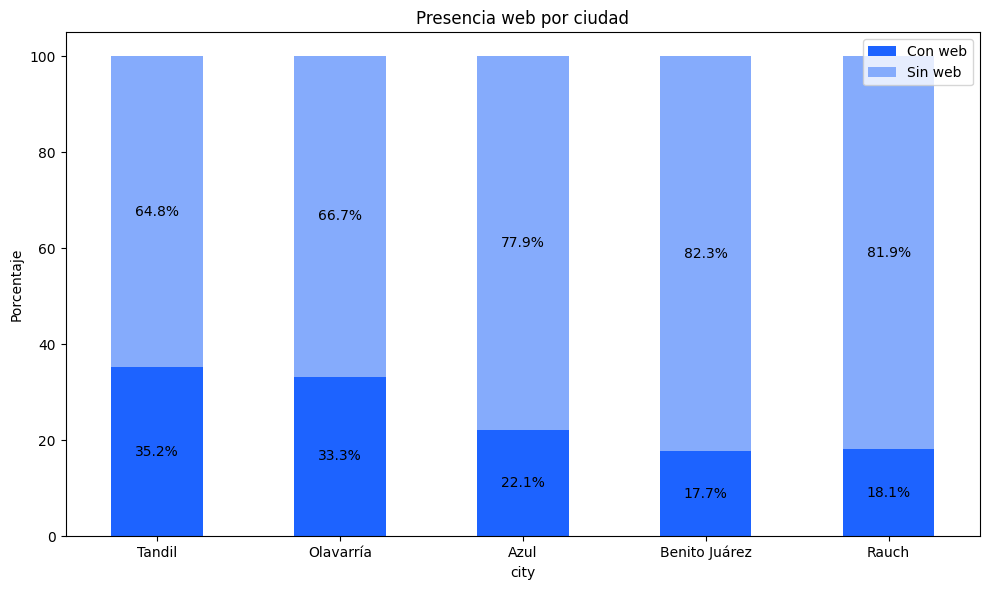

In [190]:

fig, ax = plt.subplots(figsize=(10, 6))
resumen[['complete_pct', 'Incomplete_pct']].plot(
    kind='bar', stacked=True, ax=ax, color=["#1D63FF", "#85abfc"]
)

# Agregar los porcentajes en cada barra
for container in ax.containers:
    labels = [f'{w:.1f}%' if w > 0 else '' for w in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', color='black', fontsize=10)

plt.ylabel('Porcentaje')
plt.title('Presencia web por ciudad')
plt.legend(['Con web', 'Sin web'])
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

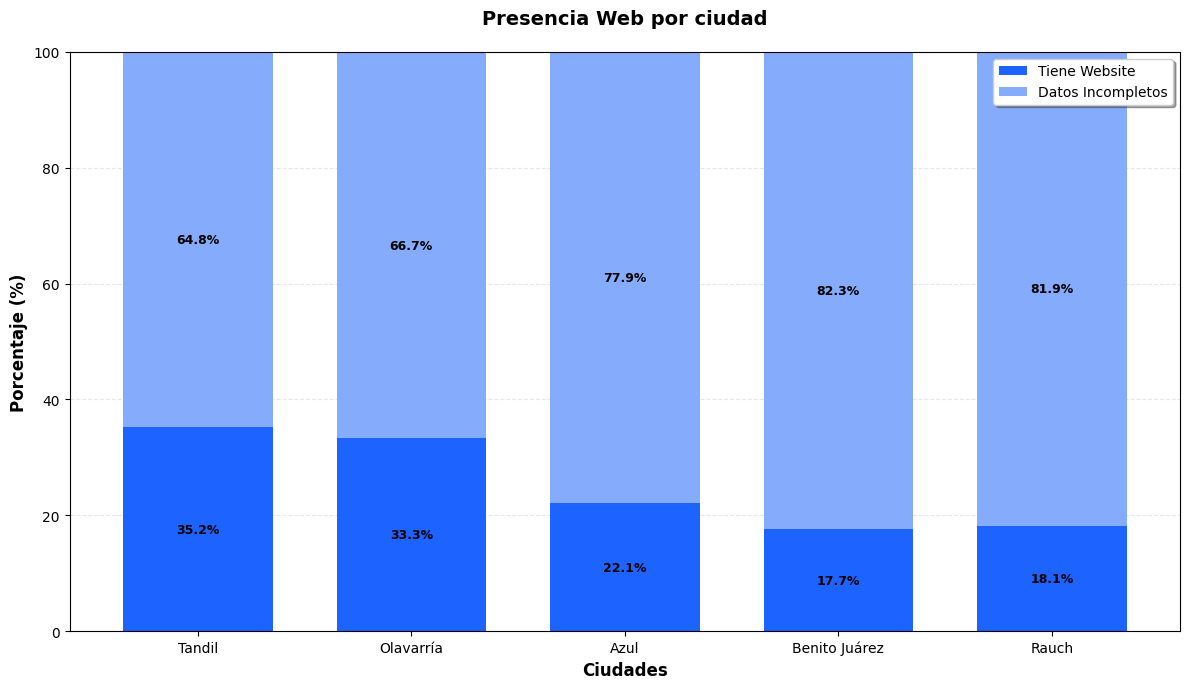

Promedio con Website: 25.3%


In [191]:
# Visualización profesional de completitud de datos por ciudad
fig, ax = plt.subplots(figsize=(12, 7))

# Crear gráfico con colores profesionales y contraste mejorado
resumen[['complete_pct', 'Incomplete_pct']].plot(
    kind='bar', 
    stacked=True, 
    ax=ax, 
    color=["#1D63FF", "#85abfc"],
    width=0.7,
    edgecolor='none',
    linewidth=0.8
)
# Etiquetas de porcentaje solo donde sean legibles
for i, container in enumerate(ax.containers):
    labels = [f'{w:.1f}%' if w > 5 else '' for w in container.datavalues]  # Solo mostrar si >5%
    ax.bar_label(container, labels=labels, label_type='center', 
                color='black', fontweight='bold', fontsize=9)

# Personalización
ax.set_ylabel('Porcentaje (%)', fontsize=12, fontweight='bold')
ax.set_title('Presencia Web por ciudad', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Ciudades', fontsize=12, fontweight='bold')

# Mejorar leyenda
ax.legend(['Tiene Website', 'Datos Incompletos'], 
        loc='upper right', frameon=True, shadow=True, 
        fancybox=True, fontsize=10)
# Rotar labels si hay muchas ciudades
plt.xticks(rotation=45 if len(resumen) > 8 else 0, ha='right' if len(resumen) > 8 else 'center')
# Personalizar ejes
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 20))
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

# Estadística complementaria
print(f"Promedio con Website: {resumen['complete_pct'].mean():.1f}%")

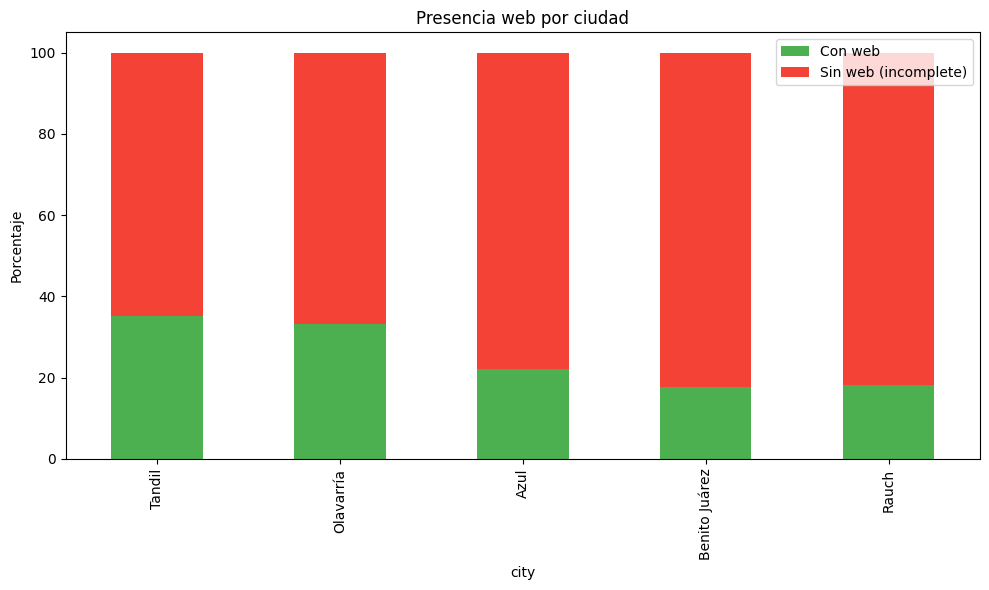

In [192]:


fig, ax = plt.subplots(figsize=(10, 6))
resumen[['complete_pct', 'Incomplete_pct']].plot(
    kind='bar', stacked=True, ax=ax, color=['#4CAF50', '#F44336']
)
plt.ylabel('Porcentaje')
plt.title('Presencia web por ciudad')
plt.legend(['Con web', 'Sin web (incomplete)'])
plt.tight_layout()
plt.show()

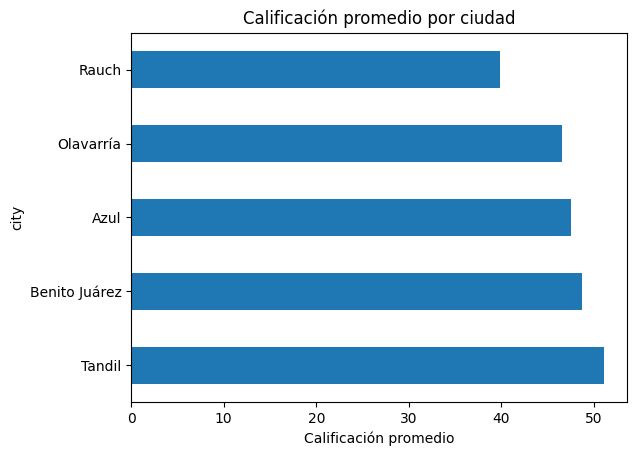

In [193]:
avg_rating = df.groupby('city')['rank'].mean().sort_values(ascending=False)
avg_rating.plot(kind='barh', title='Calificación promedio por ciudad')
plt.xlabel('Calificación promedio')
plt.show()


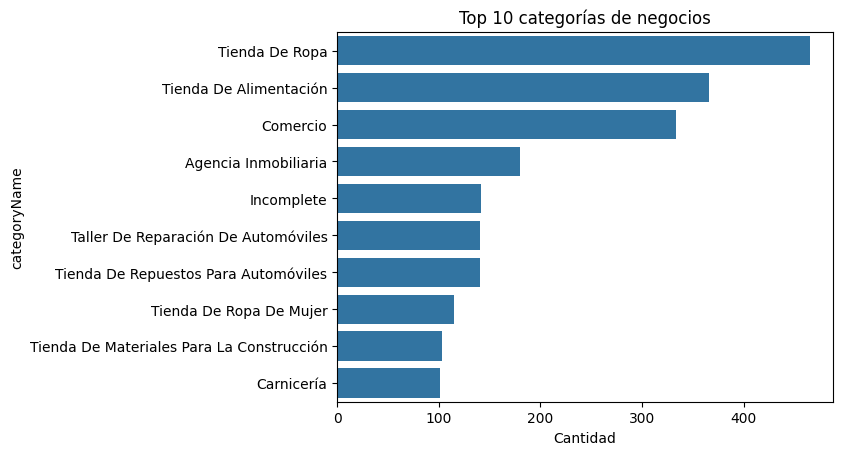

In [194]:
top_categories = df['categoryName'].value_counts().head(10)

sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 categorías de negocios')
plt.xlabel('Cantidad')
plt.show()



<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

## Distribución de negocios por ciudad

</div>

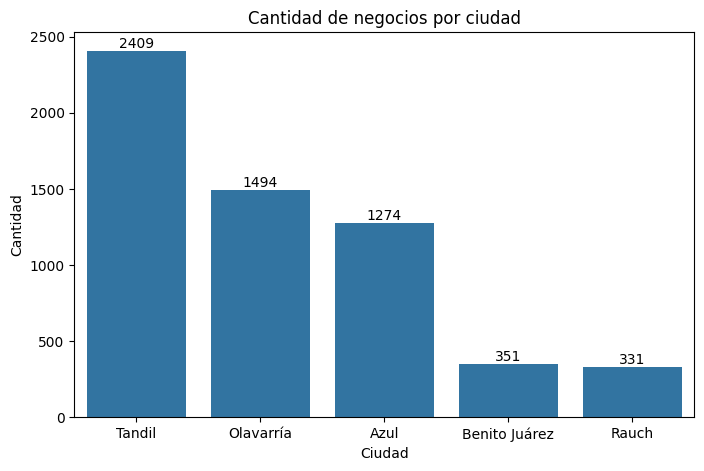

El color de la primera barra es: (0.19460784313725488, 0.45343137254901944, 0.632843137254902, 1.0)


In [195]:
city_counts = df['city'].value_counts()

plt.figure(figsize=(8,5))
barplot = sns.barplot(x=city_counts.index, y=city_counts.values)

for index, value in enumerate(city_counts.values):
    barplot.text(index, value, str(value), ha='center', va='bottom')
# Configurar títulos y etiquetas
plt.title('Cantidad de negocios por ciudad')
plt.ylabel('Cantidad')
plt.xlabel('Ciudad')
plt.show()
first_bar_color = barplot.patches[0].get_facecolor()
print(f"El color de la primera barra es: {first_bar_color}")

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

## Principales categorías de negocios

Se identifican las categorías de negocios más frecuentes en la región.

</div>



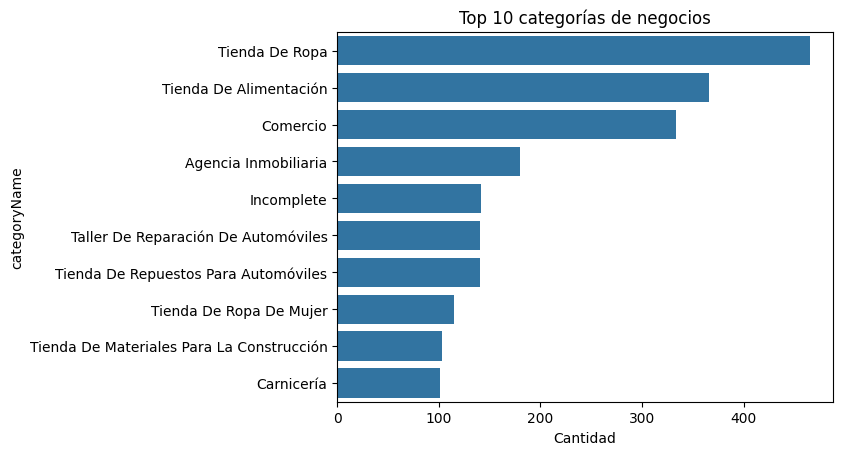

In [196]:
top_categories = df['categoryName'].value_counts().head(10)

sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 categorías de negocios')
plt.xlabel('Cantidad')
plt.show()


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

## Análisis de calificaciones promedio por ciudad

</div>

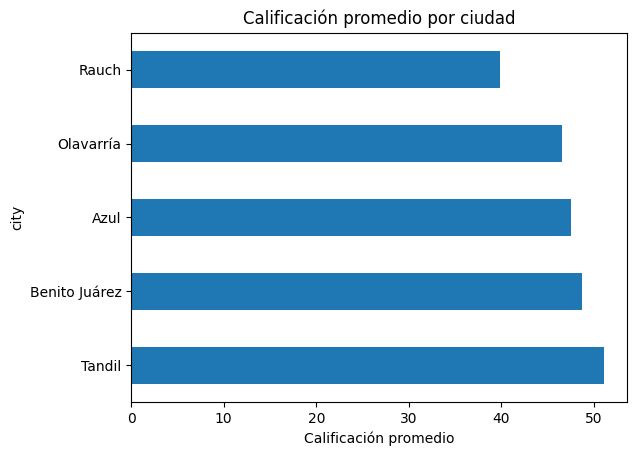

In [197]:
avg_rating = df.groupby('city')['rank'].mean().sort_values(ascending=False)
avg_rating.plot(kind='barh', title='Calificación promedio por ciudad')
plt.xlabel('Calificación promedio')
plt.show()


## Conclusiones

- La ciudad X tiene la mayor cantidad de negocios registrados.
- Las categorías más frecuentes son Restaurants, Grocery, etc.
- Las calificaciones promedio muestran oportunidades de mejora en ciertas ciudades.

Próximos pasos:
- Profundizar en análisis de reviews.
- Analizar correlaciones entre ubicación y puntuaciones.


# Elegir una paleta armónica
color_palette = px.colors.qualitative.Pastel

fig = px.bar(
    category_counts,
    x='count',
    y='website_category',
    orientation='h',
    color='website_category',
    color_discrete_sequence=color_palette,
    text='count'
)

fig.update_layout(
    title='Distribución de Tipos de Presencia Online de Negocios Locales',
    xaxis_title='Cantidad de Negocios',
    yaxis_title='Tipo de Presencia Online',
    showlegend=False,
    plot_bgcolor='white',
    font=dict(size=14)
)

fig.update_traces(
    textposition='outside'
)

fig.show()


import pandas as pd
import plotly.express as px

# Filtrar filas con website válido
df_valid = df[~df['website'].isna() & (df['website'].str.strip() != '')]

# Keywords
keywords = [
    "facebook",
    "mercadoshops",
    "mercadolibre",
    "tiendanube",
    "wa.me",
    "guia-dorada.com.ar",
    "pedidosya.com.ar",
    "region20",
    "empretienda",
    "gurugo",
    "wixsite",
    ".gob",
    ".gov",
    "tiendanegocio",
    "sites.google.com"
]

# Función para categorizar
def categorize_website(site):
    site_lower = str(site).lower()
    for kw in keywords:
        if kw in site_lower:
            return kw
    return 'ownDomain'

# Aplicar categorización
df_valid['website_category'] = df_valid['website'].apply(categorize_website)

# Contar ocurrencias
category_counts = df_valid['website_category'].value_counts().reset_index()
category_counts.columns = ['website_category', 'count']
category_counts = category_counts.sort_values(by='count', ascending=True)

# Plotly
color_palette = px.colors.qualitative.Pastel

fig = px.bar(
    category_counts,
    x='count',
    y='website_category',
    orientation='h',
    color='website_category',
    color_discrete_sequence=color_palette,
    text='count'
)

fig.update_layout(
    title='Distribución de Tipos de Presencia Online de Negocios Locales',
    xaxis_title='Cantidad de Negocios',
    yaxis_title='Tipo de Presencia Online',
    showlegend=False,
    plot_bgcolor='white',
    font=dict(size=14)
)

fig.update_traces(
    textposition='outside'
)

fig.show()


In [198]:
# Agrupar por ciudad y categoría
category_counts = (
    df
    .groupby(['city', 'categoryName'])
    .size()
    .reset_index(name='website_count')
)
category_counts = category_counts.sort_values(by='website_count', ascending=False)
category_counts

,city,categoryName,website_count
1218,Tandil,Tienda De Ropa,161
235,Azul,Tienda De Ropa,142
1119,Tandil,Tienda De Alimentación,137
865,Tandil,Comercio,124
37,Azul,Comercio,110
...,...,...,...
21,Azul,Centro Comunitario,1
20,Azul,Centro Comercial,1
19,Azul,Carpintería,1
18,Azul,Carpintero,1


PASO 2 — Agrupar por ciudad y categoría
Contamos cuántos websites hay en cada categoría dentro de cada ciudad.



# Total de websites por ciudad
total_by_city = (
    city_category_counts
    .groupby('city')['website_count']
    .sum()
    .reset_index(name='total_city')
)

# Merge para calcular el porcentaje
city_category_counts = city_category_counts.merge(
    total_by_city,
    on='city',
    how='left'
)

city_category_counts['percentage'] = (
    city_category_counts['website_count'] / city_category_counts['total_city'] * 100
).round(2)

# Crear texto doble
city_category_counts['text_label'] = (
    "N = " + city_category_counts['website_count'].astype(str) +
    "<br>" +
    city_category_counts['percentage'].astype(str) + " %"
)

PASO 3 — Calcular % dentro de cada ciudad
Queremos saber el porcentaje que cada categoría representa dentro de su ciudad.

# Total de websites por ciudad
total_by_city = (
    city_category_counts
    .groupby('city')['website_count']
    .sum()
    .reset_index(name='total_city')
)

# Merge para calcular el porcentaje
city_category_counts = city_category_counts.merge(
    total_by_city,
    on='city',
    how='left'
)

city_category_counts['percentage'] = (
    city_category_counts['website_count'] / city_category_counts['total_city'] * 100
).round(2)

# Crear texto doble
city_category_counts['text_label'] = (
    "N = " + city_category_counts['website_count'].astype(str) +
    "<br>" +
    city_category_counts['percentage'].astype(str) + " %"
)
PASO 4 — Generar un gráfico por ciudad
Ahora generamos un gráfico individual para cada ciudad.


cities = city_category_counts['city'].unique()

for city in cities:
    df_city = city_category_counts[city_category_counts['city'] == city]
    
    # Podés mostrar solo el top 10 de categorías
    df_city_top = df_city.sort_values('website_count', ascending=False).head(10)
    
    fig = px.bar(
        df_city_top.sort_values('website_count', ascending=True),
        x='website_count',
        y='categoryName',
        orientation='h',
        text='text_label',
        color_discrete_sequence=px.colors.qualitative.Set3,
        title=f"Categorías con MÁS páginas web en {city}",
        hover_data={
            'website_count': True,
            'percentage': True,
            'categoryName': False,
            'text_label': False
        },
        labels={
            'website_count': 'Cantidad de páginas web',
            'categoryName': 'Categoría de Negocio'
        },
        height=500
    )
    
    fig.update_layout(
        plot_bgcolor="#FDF6F6",
        title={
            'x': 0.5,
            'xanchor': 'center',
            'font': {
                'family': 'Arial, sans-serif',
                'size': 20,
                'color': 'darkblue'
            }
        },
        margin=dict(t=80, b=80, r=250),
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=-0.3,
            xanchor='center',
            x=0.5
        )
    )
    
    fig.update_traces(
        textposition='inside',
        insidetextanchor='middle'
    )
    
    fig.show()


    